In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=3)

In [5]:
df = pd.read_csv('results_blackbox_20-71.csv')
df['ratio'] = df.best_cost / df.optimum
df['found'] = df.best_cost == df.optimum
df['dataset'] = '20-71'
df2071 = df

df = pd.read_csv('results_blackbox_20-91.csv')
df['ratio'] = df.best_cost / df.optimum
df['found'] = df.best_cost == df.optimum
df['dataset'] = '20-91'
df2091 = df

df = pd.read_csv('results_blackbox_50-218.csv')
df['ratio'] = df.best_cost / df.optimum
df['found'] = df.best_cost == df.optimum
df['dataset'] = '50-218'
df50218 = df

df = pd.read_csv('results_blackbox_75-325.csv')
df['ratio'] = df.best_cost / df.optimum
df['found'] = df.best_cost == df.optimum
df['dataset'] = '75-325'
df75325 = df

df = pd.concat([df2071, df2091, df50218, df75325], axis=0)


In [62]:
x = df.groupby(df['dataset']).found.mean().reset_index()
x


0.8981791666666668

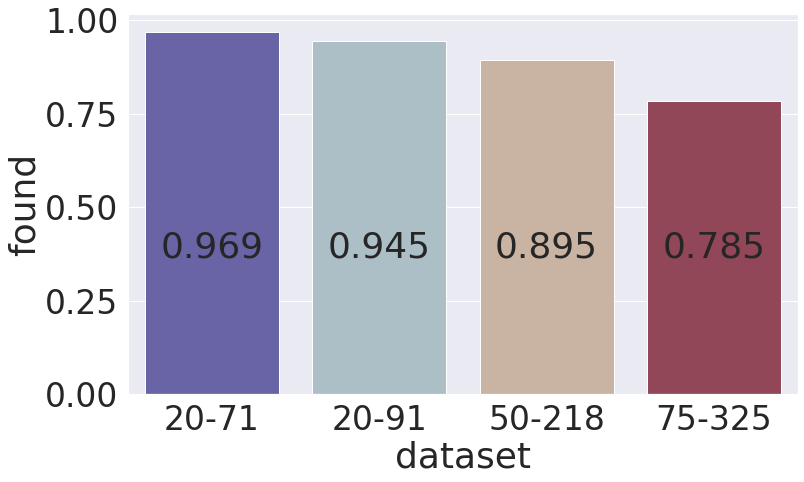

In [43]:
fig, ax = plt.subplots(figsize=(12, 7),)
fig = sns.barplot(data=x, x='dataset', y='found', palette='twilight_shifted',)

height = fig.patches[0].get_height() - 0.6
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

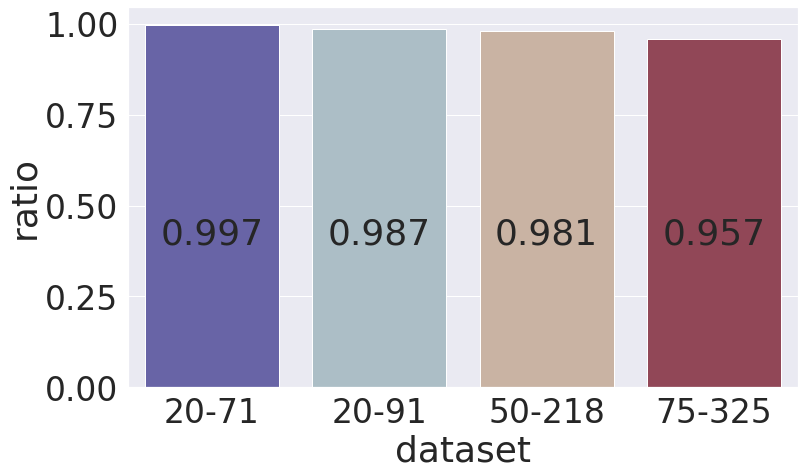

In [45]:
fig, ax = plt.subplots(figsize=(12, 7),)
fig = sns.barplot(data=df.groupby(df['dataset']).ratio.mean().reset_index(), x='dataset', y='ratio', palette='twilight_shifted',)

height = fig.patches[0].get_height() - 0.6
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [65]:
not_found = df[df.found != 1].reset_index()[['dataset', 'ratio']]
not_found[not_found.ratio > 0].ratio.min()

0.0009855453350854138

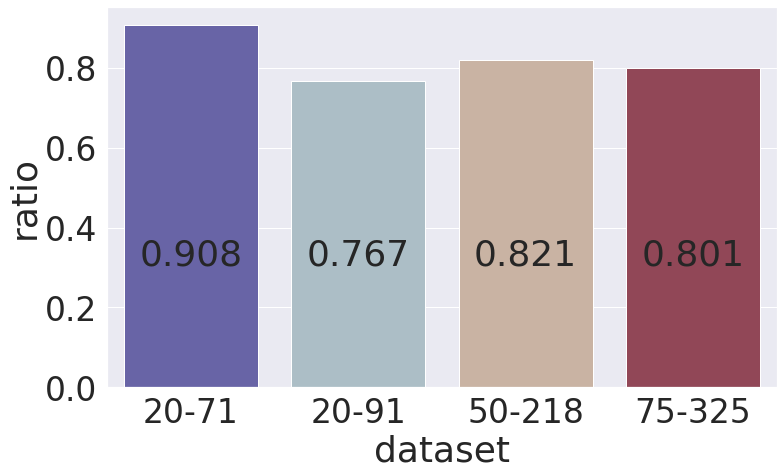

In [60]:
fig, ax = plt.subplots(figsize=(12, 7),)
fig = sns.barplot(data=not_found.groupby(not_found['dataset']).ratio.mean().reset_index(), x='dataset', y='ratio', palette='twilight_shifted',)

height = fig.patches[0].get_height() - 0.6
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

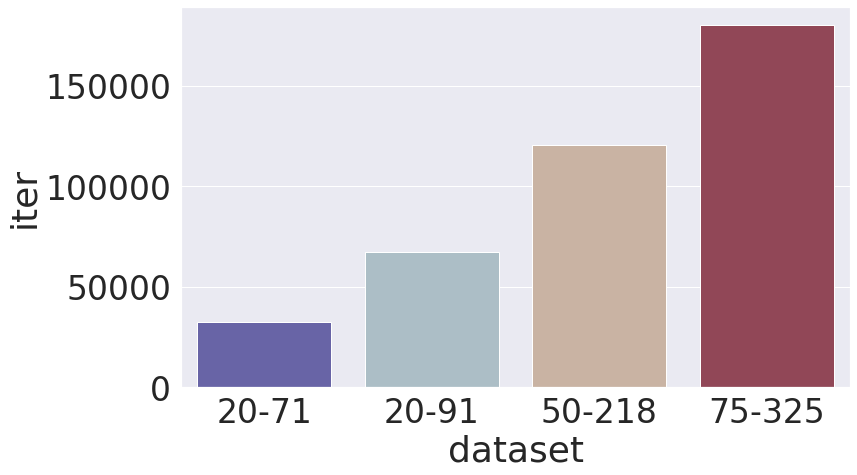

In [50]:
fig, ax = plt.subplots(figsize=(12, 7),)
fig = sns.barplot(data=df.groupby(df['dataset']).iter.mean().reset_index(), x='dataset', y='iter', palette='twilight_shifted',)


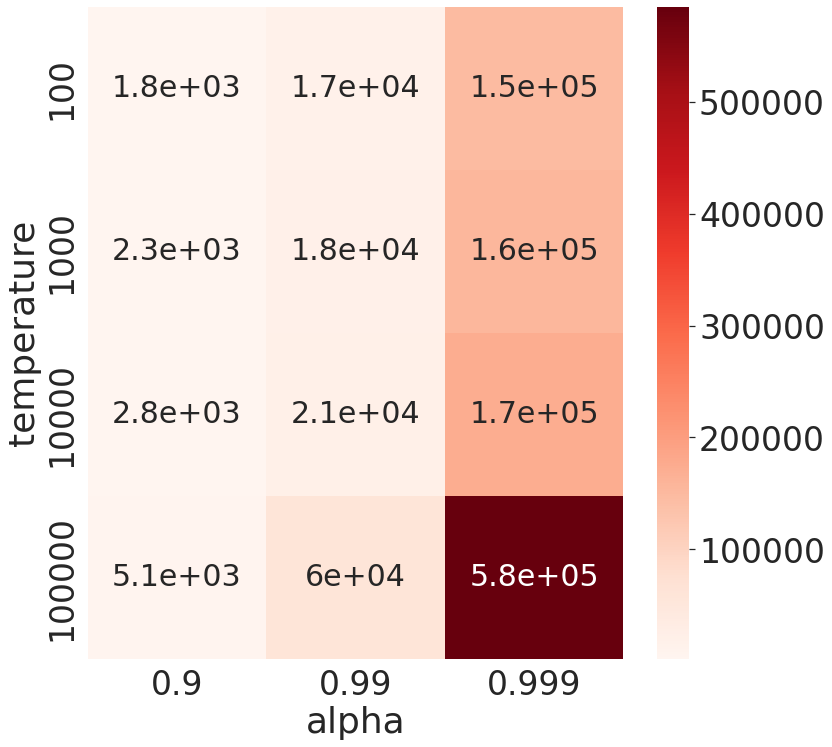

In [25]:
heatmap = grouped.reset_index().pivot(index='temperature', columns='alpha')['iter']
fig, ax = plt.subplots(figsize=(12, 12), )
fig = sns.heatmap(heatmap, annot=True, annot_kws={"fontsize": 30}, cmap="Reds")

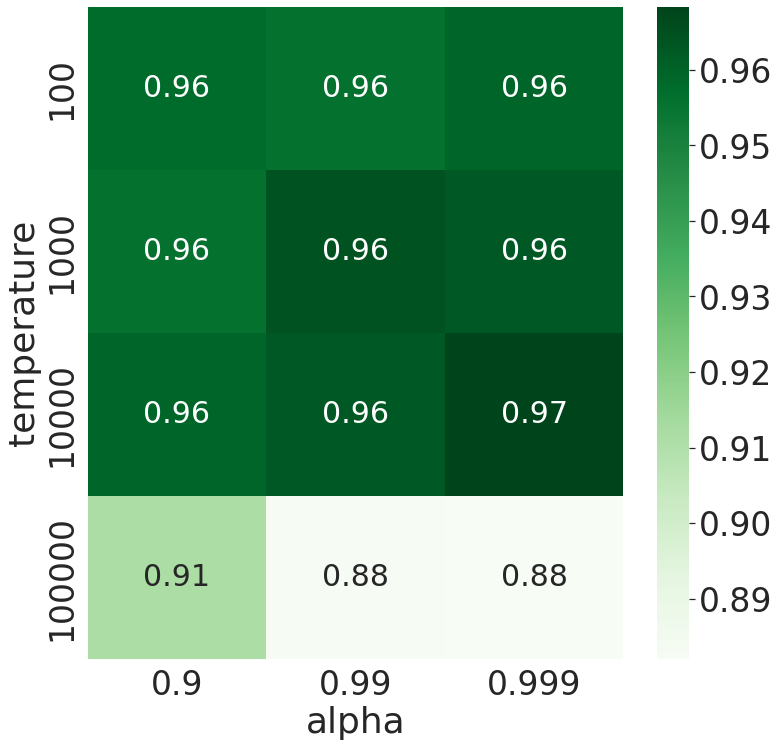

In [26]:


heatmap = grouped.reset_index().pivot(index='temperature', columns='alpha')['ratio']
fig, ax = plt.subplots(figsize=(12, 12), )
fig = sns.heatmap(heatmap, annot=True, annot_kws={"fontsize": 30}, cmap="Greens")
